# Assignment 1

<font color=darkblue>
    
In this assignment you will perform EDA (Exploratory Data Analysis) on the Seaborn 'penguins' dataset. This is a dataset comprised of various measurements of different penguin species.

You will perform some basic data discovery, followed by univariate, multivariate, and bivariate data visualization.

1. Basic Data Discovery
2. Univariate Analysis
3. Multivariate Analysis
4. Bivariate Analysis

Where prompted, replace "_____" with the appropriate code. In all other cases you will either write your own code or answer with text. 

## Basic Data Discovery 



### Q1.1 Import the pandas, matplotlib, and seaborn libraries

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Q1.2 Load the Seaborn 'penguins' dataset

In [83]:
# load the 'penguins' dataset from seaborn
dataset = sns.load_dataset('penguins')

### Q1.3 Check data head()

In [84]:
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Q1.4 Check basic stats on the continuous variables using describe()

In [85]:
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Q1.5a Check the dimensions of your dataset using shape().

In [86]:
dataset.shape

(344, 7)

#### Q1.5b How many rows are in the dataset?

**344** rows are in the dataset.

### Q1.6 Check the column data types



In [87]:
dataset.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Q1.7 Check for missing values

In [89]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(dataset)

,Total,Percent
sex,11,0.031977
bill_length_mm,2,0.005814
bill_depth_mm,2,0.005814
flipper_length_mm,2,0.005814
body_mass_g,2,0.005814
species,0,0.000000
island,0,0.000000


## Univariate Analysis

### Q2.1 Create a countplot to visualize how many observations we have for each sex.

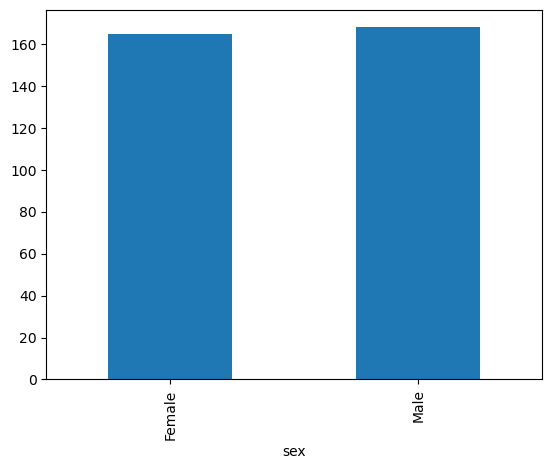

In [90]:
# countplot
dataset.groupby(['sex']).size().plot.bar()

# display the plot
plt.show()

### Q2.2 Create a countplot to visualize how many observations we have for each species.

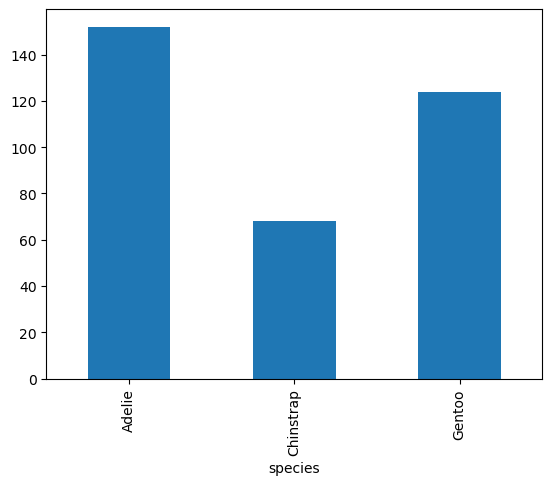

In [91]:
# countplot
dataset.groupby(['species']).size().plot.bar()

# display the plot
plt.show()

### Q2.3 Create a countplot to visualize how many observations we have for each island.

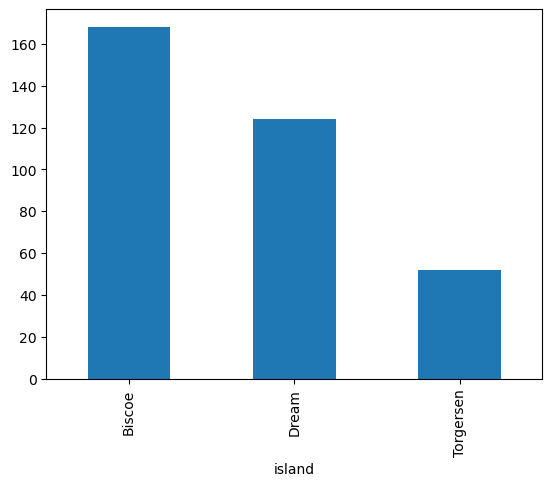

In [92]:
# countplot
dataset.groupby(['island']).size().plot.bar()

# display the plot
plt.show()

### Q2.4a Create a pie chart to visualize a breakdown on the number of observations we have for each island.

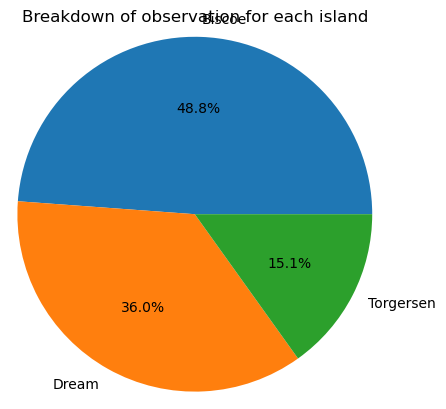

In [102]:
# pie chart
plt.pie(dataset.island.value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['Biscoe','Dream','Torgersen'])

# display the plot
plt.title('Breakdown of observation for each island')
plt.show()

#### Q2.4b Which island has the most records in this dataset?

**Biscoe** has the most reads.

### Q2.5a Create a distribution plot to visualize bill length.



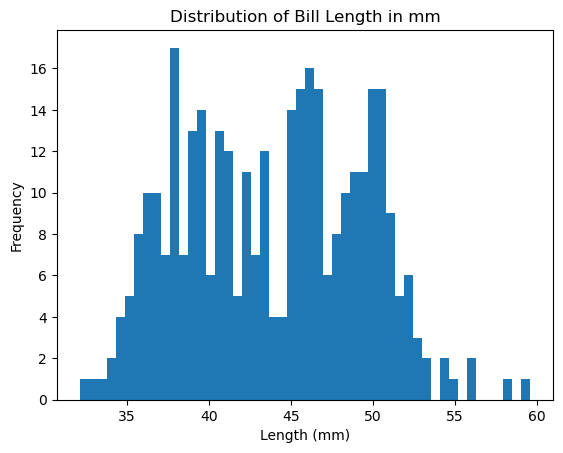

In [94]:
# distribution plot
plt.hist(dataset['bill_length_mm'], bins= 50)

# display the plot
plt.title('Distribution of Bill Length in mm')
plt.xlabel('Length (mm)')
plt.ylabel('Frequency')
plt.show()

#### Q2.5b What are your observations?

The distribution seems like an **"multi-variance gaussian"** distribution. Only a few penguins have bill length less than 35 mm. Similarly, not too many penguins with bill longer than 55 mm.

### Q2.6a Create a distribution plot to visualize bill depth. 


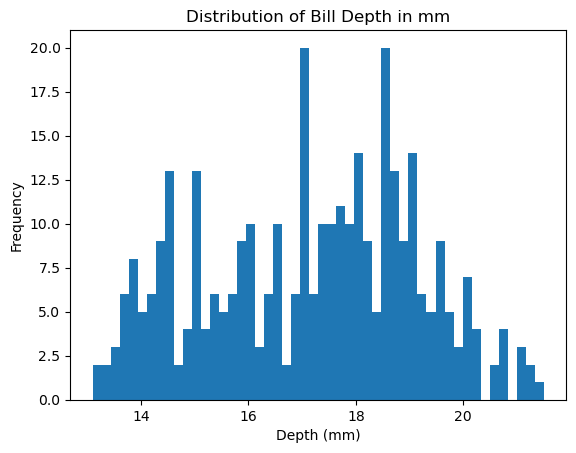

In [95]:
# distribution plot
plt.hist(dataset['bill_depth_mm'], bins= 50)

# display the plot
plt.title('Distribution of Bill Depth in mm')
plt.xlabel('Depth (mm)')
plt.ylabel('Frequency')
plt.show()

#### Q2.6b What are your observations?

Similar to the bill length distribution plot, the distribution for the bill depth seems like an **"multi-variance gaussian"** distribution as well. We could observe that most of the depth are around 18mm. 

### Q2.7 Create a violin plot to compare body mass and species.



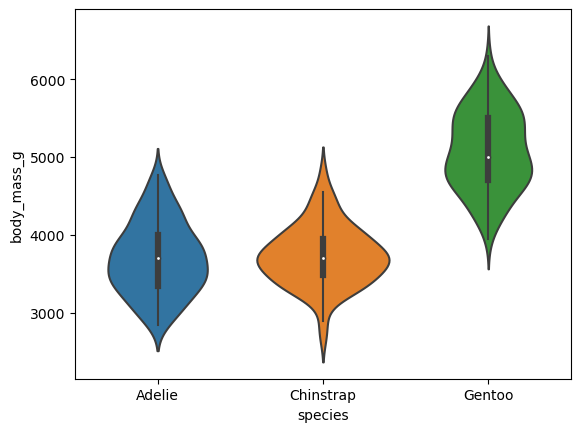

In [96]:
# violin plot
sns.violinplot(y = 'body_mass_g', x = 'species', data = dataset)

# display the plot
plt.show()

## Multivariate Analysis

### Q3.1 Compute correlation between continuous variables in the dataset.

In [97]:
corr_matrix = dataset.corr()

corr_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


### Q3.2a Plot the correlations as a heatmap. 



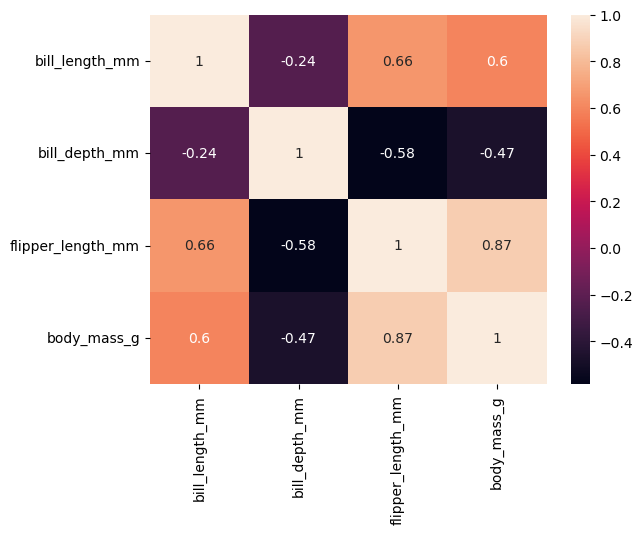

In [98]:
# plot heatmap
# 'annot=True' returns the correlation values 
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

#### Q3.2b Which variables are positively correlated? Which are negatively correlated?

**positively correlated**：
- *flipper_length_mm* & *bill_length_mm*
- *body_mass_g* & *bill_length_mm*
- *body_mass_g* & *flipper_length_mm*


**Negatively correlated**：
- *bill_depth_mm* & *bill_length_mm*
- *flipper_length_mm* & *bill_depth_mm*
- *body_mass_g* & *bill_depth_mm*

## Bivariate Analysis

### Q4.1a Create a scatter plot to visualize how body mass and flipper length are related. 

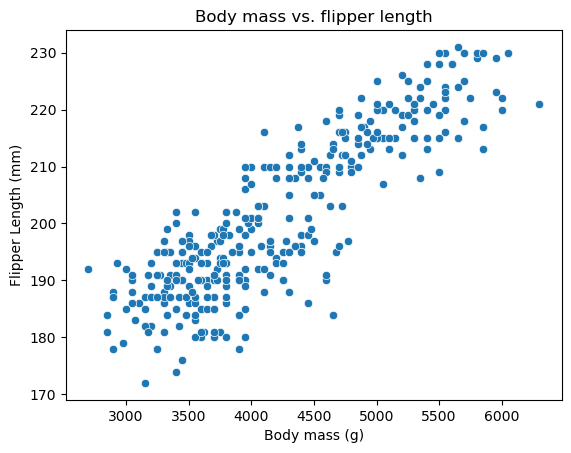

In [99]:
# data
X = dataset['body_mass_g']
Y = dataset['flipper_length_mm']

# plot the scatter plot
sns.scatterplot(x=X,y=Y)

# add the axes labels to the plot
plt.title('Body mass vs. flipper length')
plt.xlabel('Body mass (g)')
plt.ylabel('Flipper Length (mm)')

# display the plot
plt.show()

#### Q4.1b What are your observations?

There is a **positive relationship** between Body mass and flipper length. Flipper length increases as Body mass growth. 

### Q4.2a Create a barplot with body mass as the y-axis, sex as the x-axis, and use hue to differentiate between species.

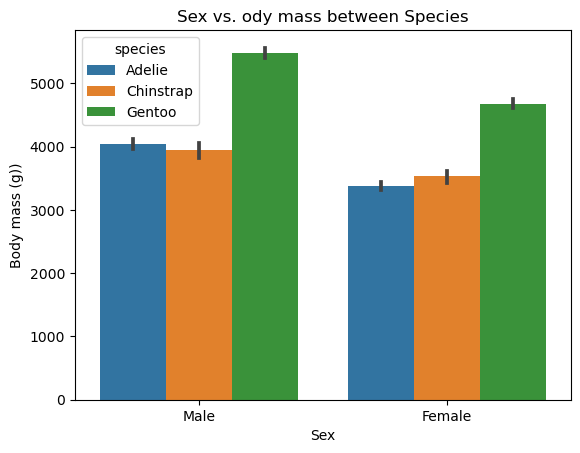

In [100]:
# Barplot
sns.barplot(data=dataset,x='sex',y='body_mass_g',hue='species')

# add the axes labels to the plot
plt.title('Sex vs. ody mass between Species')
plt.xlabel('Sex')
plt.ylabel('Body mass (g))')

# Display the plot
plt.show()

#### Q4.2b What do you notice about the female Gentoo when compared to male Adelie and Chinstrap species?

In general, Females are having lower body mass with respect to their corresponding specie's male. But Female Gentoo are having **greater body mass in average** than male Adelie and Chinstrap

### Q4.3a Create a distribution plot to visualize flipper length, and use hue to differentiate between sex. 

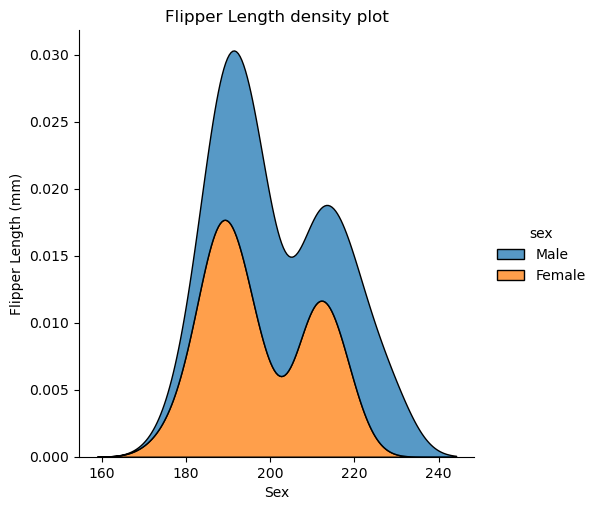

In [103]:
sns.displot(data=dataset, x='flipper_length_mm', hue='sex', kind='kde', multiple= 'stack')

# add the axes labels to the plot
plt.title('Flipper Length density plot')
plt.xlabel('Sex')
plt.ylabel('Flipper Length (mm)')

# Display the plot
plt.show()

#### Q4.3b What do you notice about these distributions?

We could clearly observe that females are generally have **less** flipper length. Both sex, male and female showing a **mix-gaussian distribution**, where it might du to the fact that there are mixed species.

### Q4.4 Create a pointplot to visualize average flipper length for each species along with the confidence intervals.

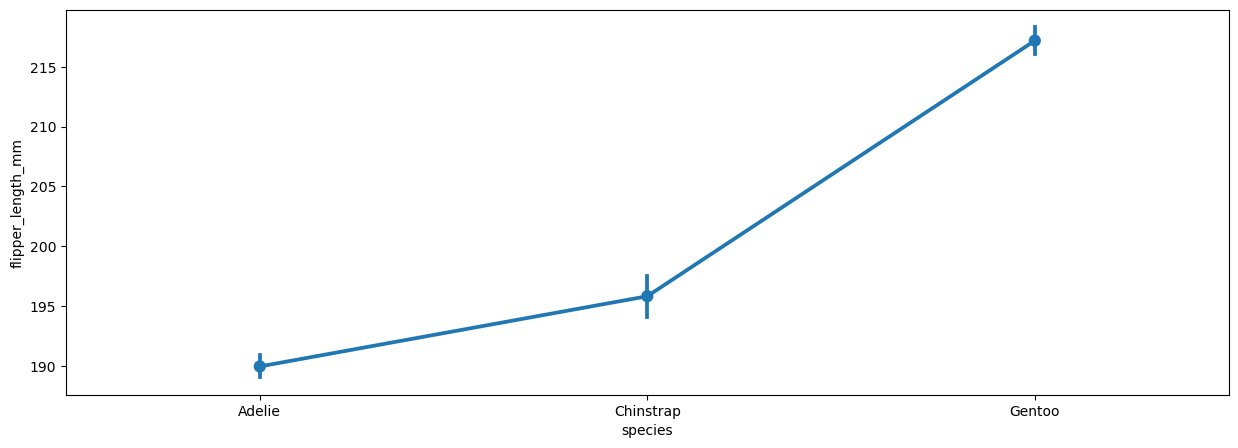

In [ ]:
plt.figure(figsize=(15,5))

sns.pointplot(x="species", y="flipper_length_mm",   data=dataset)
plt.show()